In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("data/train_transaction.csv")

In [3]:
fraud = shuffle(df[df.isFraud == 1])
normal = shuffle(df[df.isFraud == 0])
df.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

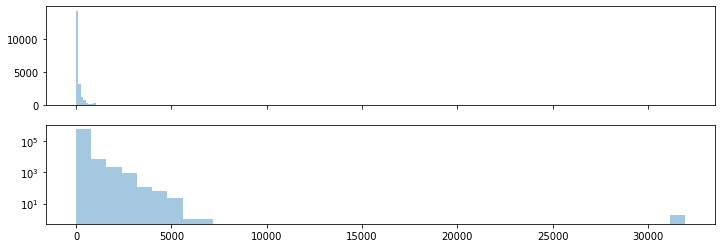

In [4]:
t,(ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
sns.distplot(fraud['TransactionAmt'].values,bins=40,kde=False, ax = ax1)
sns.distplot(normal['TransactionAmt'].values,bins=40,kde=False, ax = ax2)
plt.yscale('log')

In [5]:
df_i = pd.read_csv("data/train_identity.csv")
df_i.dropna(inplace=True)

In [6]:
df = pd.merge(df, df_i, left_on='TransactionID', right_on='TransactionID', how='left')

In [7]:
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()
df[categorical_cols]

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,W,visa,debit,NaN,NaN,T,T,T,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,W,mastercard,debit,gmail.com,NaN,T,F,F,M0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,W,mastercard,debit,gmail.com,NaN,T,F,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,W,mastercard,debit,aol.com,NaN,T,T,T,M0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_d = pd.get_dummies( df[categorical_cols] )
df1 = df.drop(df[categorical_cols], axis=1)
df1 = pd.concat([df1, df_d], axis=1)

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df1)
df1.loc[:,:] = x_scaled
df1 = df1.fillna(0)

In [10]:
#df1 = df1.fillna(0)
#normalized = preprocessing.Normalizer().fit_transform(df1)
#df1.loc[:,:] = normalized

In [11]:
#df1 = df1.fillna(0)
df1.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,DeviceInfo_Z835 Build/NMF26V,DeviceInfo_Z956 Build/MMB29M,DeviceInfo_Z965 Build/NMF26V,DeviceInfo_Z983 Build/NMF26F,DeviceInfo_iOS Device,DeviceInfo_rv:11.0,DeviceInfo_rv:45.0,DeviceInfo_rv:52.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0
0,0.000000,0.0,0.000000e+00,0.002137,0.743044,0.000,0.381679,0.306569,0.488636,0.836957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000002,0.0,6.359409e-08,0.000900,0.100885,0.608,0.381679,0.014599,0.511364,0.836957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000003,0.0,4.387992e-06,0.001840,0.210566,0.780,0.381679,0.481752,0.522727,0.836957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000005,0.0,6.295815e-06,0.001558,0.984824,0.934,0.381679,0.124088,0.854545,0.836957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000007,0.0,6.740974e-06,0.001558,0.201023,0.828,0.381679,0.014599,0.727273,0.836957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
Y = df1['isFraud']
X = df1.drop(['TransactionID', 'TransactionDT', 'isFraud'], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [14]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=1000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
logisticRegr.score(X_test, y_test)

0.9717207979137739

In [16]:
df_t = pd.read_csv("data/test_transaction.csv")
df_ti = pd.read_csv("data/test_identity.csv")
df_ti.dropna(inplace=True)
df_t = pd.merge(df_t, df_ti, left_on='TransactionID', right_on='TransactionID', how='left')

In [17]:
df_dt = pd.get_dummies( df_t[categorical_cols] )
df_t1 = df_t.drop(df_t[categorical_cols], axis=1)
df_t1 = pd.concat([df_t1, df_dt], axis=1)
df_t1.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,DeviceInfo_Z959 Build/LMY47V,DeviceInfo_iOS Device,DeviceInfo_moto,DeviceInfo_moto e5 cruise,DeviceInfo_moto x4,DeviceInfo_rv:11.0,DeviceInfo_rv:60.0,DeviceInfo_rv:62.0,DeviceInfo_rv:63.0,DeviceInfo_rv:64.0
0,3663549,18403224,31.95,10409,111.0,150.0,226.0,170.0,87.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.0,150.0,226.0,299.0,87.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.0,150.0,226.0,472.0,87.0,2635.0,...,0,0,0,0,0,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.0,150.0,166.0,205.0,87.0,17.0,...,0,0,0,0,0,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.0,150.0,117.0,264.0,87.0,6.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
x_scaled_t = min_max_scaler.fit_transform(df_t1)
df_t1.loc[:,:] = x_scaled_t
df_t1 = df_t1.reindex(labels=df1.columns,axis=1)
df_t1 = df_t1.fillna(0)

In [19]:
df_t1.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,DeviceInfo_Z835 Build/NMF26V,DeviceInfo_Z956 Build/MMB29M,DeviceInfo_Z965 Build/NMF26V,DeviceInfo_Z983 Build/NMF26F,DeviceInfo_iOS Device,DeviceInfo_rv:11.0,DeviceInfo_rv:45.0,DeviceInfo_rv:52.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0
0,0.000000,0.0,0.000000,0.003109,0.540814,0.022,0.378788,0.919708,0.159091,0.836957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000002,0.0,0.000002,0.004769,0.188032,0.022,0.378788,0.919708,0.452273,0.836957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000004,0.0,0.000005,0.016649,0.199759,0.948,0.378788,0.919708,0.845455,0.836957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000006,0.0,0.000005,0.027744,0.574155,0.520,0.378788,0.481752,0.238636,0.836957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000008,0.0,0.000006,0.006615,0.978213,0.704,0.378788,0.124088,0.372727,0.836957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_t = df_t1.drop(['TransactionID', 'TransactionDT', 'isFraud'], axis=1)
Y_t = logisticRegr.predict(X_t)

In [21]:
res = pd.DataFrame({'isFraud': Y_t, 'TransactionID': df_t.TransactionID})
res.isFraud.value_counts()

0.0    493032
1.0     13659
Name: isFraud, dtype: int64

In [22]:
res.head()

,isFraud,TransactionID
0,0.0,3663549
1,0.0,3663550
2,0.0,3663551
3,0.0,3663552
4,0.0,3663553


In [23]:
res.to_csv('data/fraud-detection-w3.csv', index = None, header=True) 